<a href="https://colab.research.google.com/github/AROP019/Proyecto-PrediccionIndicadores/blob/main/Copia_de_Etapa3_intento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
datos = pd.read_csv('final_dataframe.csv')
datos

,REL_H_M,PROM_HNV,P3HLI_HE,P5_HLI_HE,GRAPROES,GRAPROES_F,GRAPROES_M,PROM_OCUP,PRO_OCUP_C,ic_ali,NOM_ENT
0,94.90,1.98,1792,1776,10.84,10.75,10.93,3.54,0.84,15.8,Aguascalientes
1,96.14,2.62,22,22,8.54,8.68,8.38,4.10,1.07,28.5,Aguascalientes
2,96.21,2.67,74,72,8.05,8.31,7.78,3.74,0.97,20.1,Aguascalientes
3,95.22,2.51,7,7,9.08,9.10,9.07,4.32,1.14,25.0,Aguascalientes
4,100.37,2.62,8,8,8.49,8.56,8.43,3.91,1.05,17.9,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...
2464,90.51,2.88,2,2,8.35,8.59,8.07,3.78,0.96,29.0,Zacatecas
2465,95.59,2.91,4,4,8.02,8.29,7.72,3.93,1.08,16.1,Zacatecas
2466,99.35,2.65,178,171,7.72,8.00,7.44,3.77,1.03,14.1,Zacatecas
2467,97.63,2.81,13,13,8.08,8.27,7.88,3.47,0.84,26.0,Zacatecas


In [ ]:
datos.isnull().sum()

,0
REL_H_M,0
PROM_HNV,0
P3HLI_HE,0
P5_HLI_HE,0
GRAPROES,0
GRAPROES_F,0
GRAPROES_M,0
PROM_OCUP,0
PRO_OCUP_C,0
ic_ali,0


In [ ]:
print(datos.columns)


Index(['REL_H_M', 'PROM_HNV', 'P3HLI_HE', 'P5_HLI_HE', 'GRAPROES',
       'GRAPROES_F', 'GRAPROES_M', 'PROM_OCUP', 'PRO_OCUP_C', 'ic_ali',
       'NOM_ENT'],
      dtype='object')


In [ ]:
datos.shape

(2469, 11)

In [ ]:
print(datos.isnull().sum())

REL_H_M       0
PROM_HNV      0
P3HLI_HE      0
P5_HLI_HE     0
GRAPROES      0
GRAPROES_F    0
GRAPROES_M    0
PROM_OCUP     0
PRO_OCUP_C    0
ic_ali        0
NOM_ENT       0
dtype: int64


In [ ]:
import pandas as pd

y = datos["ic_ali"]  # Reemplaza con el nombre de la variable objetivo

# Calcular varianza y desviación estándar
varianza_y = y.var()
desviacion_y = y.std()

print(f"Varianza de y: {varianza_y}")
print(f"Desviación estándar de y: {desviacion_y}")

Varianza de y: 135.11053073829967
Desviación estándar de y: 11.623705551083942


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Modelo: Regresión Lineal
MSE: 0.0000, R^2: 1.0000

Modelo: Árbol de Decisión
MSE: 0.0020, R^2: 0.9980

Modelo: Random Forest
MSE: 0.0006, R^2: 0.9994



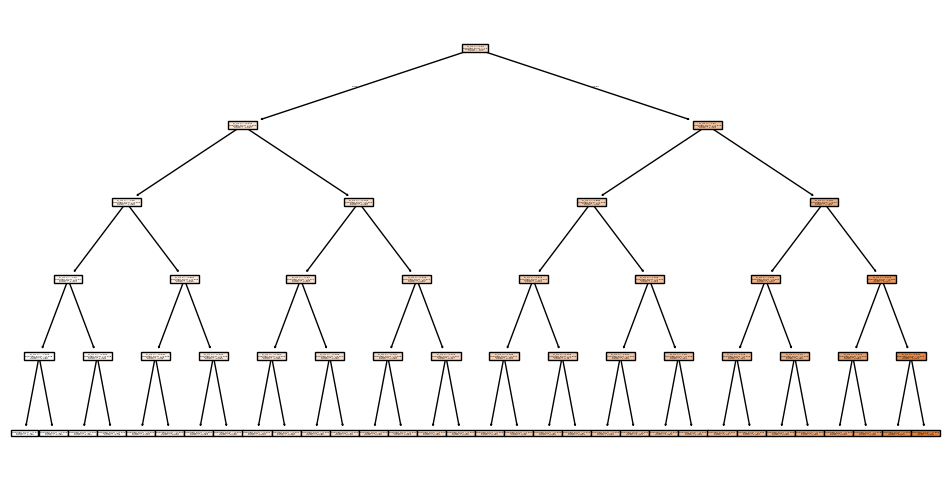

In [ ]:
columnas_utilizar = datos.columns[:10]
X = datos[columnas_utilizar]
y = datos["ic_ali"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

modelos = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train_scaled)
    y_pred = modelo.predict(X_test_scaled)

    mse = mean_squared_error(y_test_scaled, y_pred)
    r2 = r2_score(y_test_scaled, y_pred)
    resultados[nombre] = {"MSE": mse, "R^2": r2}

for nombre, metricas in resultados.items():
    print(f"Modelo: {nombre}")
    print(f"MSE: {metricas['MSE']:.4f}, R^2: {metricas['R^2']:.4f}\n")

plt.figure(figsize=(12, 6))
plot_tree(modelos["Árbol de Decisión"], filled=True, feature_names=X.columns)
plt.show()

Entrenamiento:   MSE: 10.3144, R²: 0.9227, Adjusted R²: 0.9224, MAE: 2.0245
Prueba:          MSE: 10.1912, R²: 0.9276, Adjusted R²: 0.9261, MAE: 2.1968
Validación cruzada - R² promedio: 0.9175 ± 0.0151


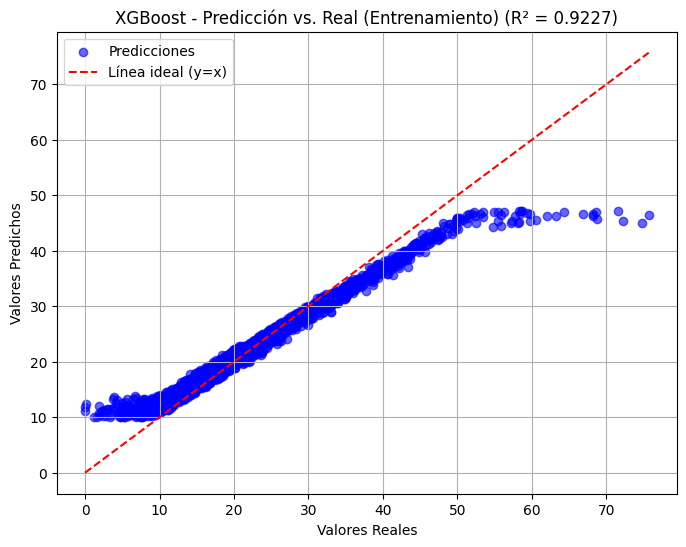

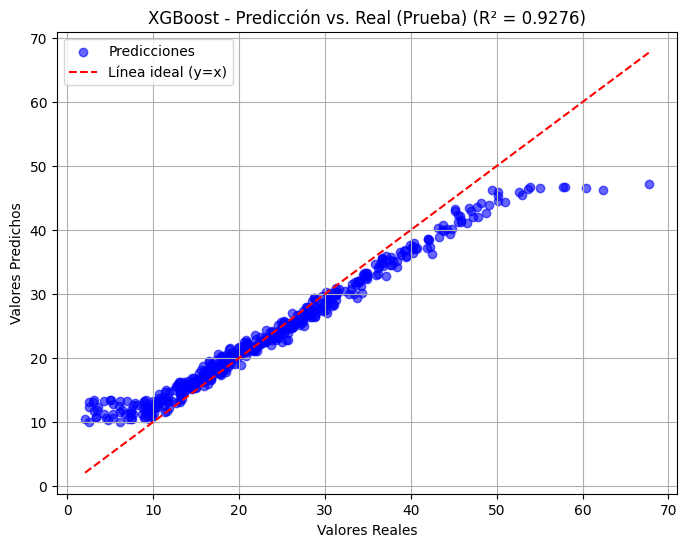

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Seleccionar las columnas a utilizar
columnas_utilizar = datos.columns[:10]
X = datos[columnas_utilizar]
y = datos["ic_ali"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo XGBoost con los datos normalizados
modelo_xgb = XGBRegressor(
    n_estimators=50, max_depth=2, learning_rate=0.05,
    reg_lambda=15, reg_alpha=10, subsample=0.7, colsample_bytree=0.7,
    random_state=42)
modelo_xgb.fit(X_train_scaled, y_train)

# Predicciones para entrenamiento y prueba
y_train_pred = modelo_xgb.predict(X_train_scaled)
y_test_pred = modelo_xgb.predict(X_test_scaled)

# Función para calcular métricas
def calcular_metricas(y_real, y_pred, X):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    n = len(y_real)
    p = X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_real, y_pred)
    return mse, r2, r2_adj, mae

# Calcular métricas para entrenamiento y prueba
mse_train, r2_train, r2_adj_train, mae_train = calcular_metricas(y_train, y_train_pred, X_train)
mse_test, r2_test, r2_adj_test, mae_test = calcular_metricas(y_test, y_test_pred, X_test)

# Validación cruzada
cv_scores = cross_val_score(modelo_xgb, X_train_scaled, y_train, cv=10, scoring='r2')

# Imprimir métricas
print(f"Entrenamiento:   MSE: {mse_train:.4f}, R²: {r2_train:.4f}, Adjusted R²: {r2_adj_train:.4f}, MAE: {mae_train:.4f}")
print(f"Prueba:          MSE: {mse_test:.4f}, R²: {r2_test:.4f}, Adjusted R²: {r2_adj_test:.4f}, MAE: {mae_test:.4f}")
print(f"Validación cruzada - R² promedio: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Función para graficar
def plot_results(y_real, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, alpha=0.6, label="Predicciones", color="blue")
    plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle="--", color="red", label="Línea ideal (y=x)")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.title(f"{title} (R² = {r2_score(y_real, y_pred):.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar resultados para entrenamiento y prueba
plot_results(y_train, y_train_pred, "XGBoost - Predicción vs. Real (Entrenamiento)")
plot_results(y_test, y_test_pred, "XGBoost - Predicción vs. Real (Prueba)")


Entrenamiento:   MSE: 10.5213, R²: 0.9246, Adjusted R²: 0.9242, MAE: 1.2420
Prueba:          MSE: 5.4077, R²: 0.9538, Adjusted R²: 0.9528, MAE: 1.0881
Validación cruzada - R² promedio: 0.9072 ± 0.0247


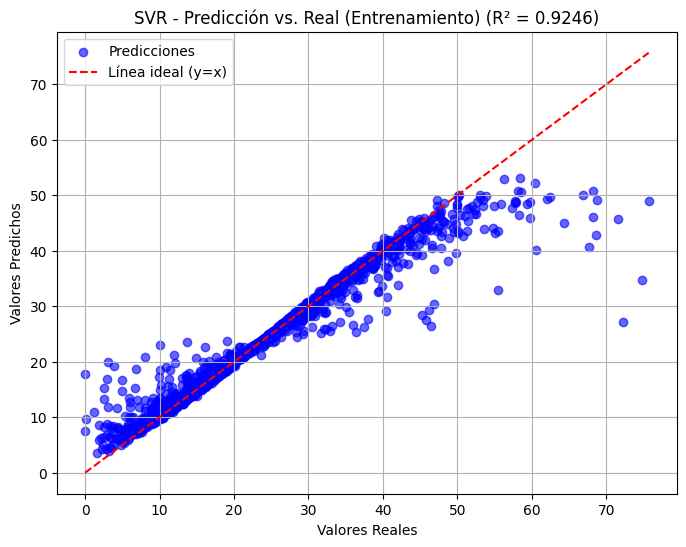

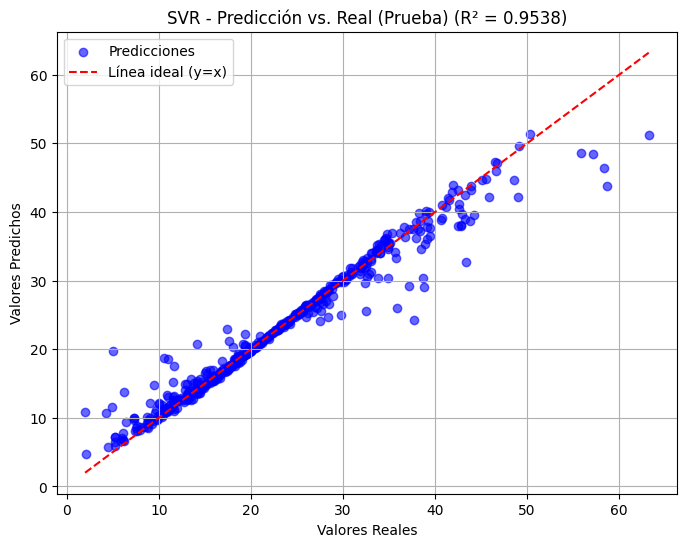

In [ ]:
# Haz un modelo svr

import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo SVR
modelo_svr = SVR()
modelo_svr.fit(X_train_scaled, y_train)

# Predicciones para entrenamiento y prueba
y_train_pred = modelo_svr.predict(X_train_scaled)
y_test_pred = modelo_svr.predict(X_test_scaled)

# Función para calcular métricas
def calcular_metricas(y_real, y_pred, X):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    n = len(y_real)
    p = X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_real, y_pred)
    return mse, r2, r2_adj, mae

# Calcular métricas para entrenamiento y prueba
mse_train, r2_train, r2_adj_train, mae_train = calcular_metricas(y_train, y_train_pred, X_train)
mse_test, r2_test, r2_adj_test, mae_test = calcular_metricas(y_test, y_test_pred, X_test)

# Validación cruzada
cv_scores = cross_val_score(modelo_svr, X_train_scaled, y_train, cv=5, scoring='r2')

# Imprimir métricas
print(f"Entrenamiento:   MSE: {mse_train:.4f}, R²: {r2_train:.4f}, Adjusted R²: {r2_adj_train:.4f}, MAE: {mae_train:.4f}")
print(f"Prueba:          MSE: {mse_test:.4f}, R²: {r2_test:.4f}, Adjusted R²: {r2_adj_test:.4f}, MAE: {mae_test:.4f}")
print(f"Validación cruzada - R² promedio: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Función para graficar
def plot_results(y_real, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, alpha=0.6, label="Predicciones", color="blue")
    plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle="--", color="red", label="Línea ideal (y=x)")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.title(f"{title} (R² = {r2_score(y_real, y_pred):.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar resultados para entrenamiento y prueba
plot_results(y_train, y_train_pred, "SVR - Predicción vs. Real (Entrenamiento)")
plot_results(y_test, y_test_pred, "SVR - Predicción vs. Real (Prueba)")

Entrenamiento:   MSE: 2.8411, R²: 0.9793, Adjusted R²: 0.9792, MAE: 0.9538
Prueba:          MSE: 4.8145, R²: 0.9617, Adjusted R²: 0.9609, MAE: 1.2427
Validación cruzada - R² promedio: 0.9504 ± 0.0157


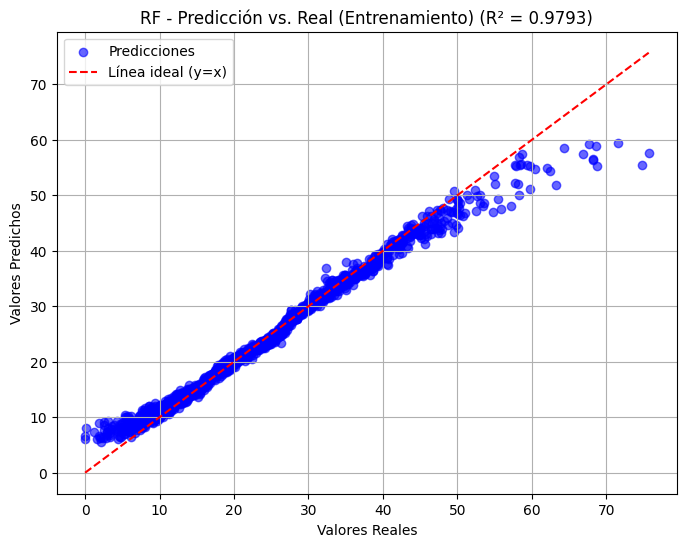

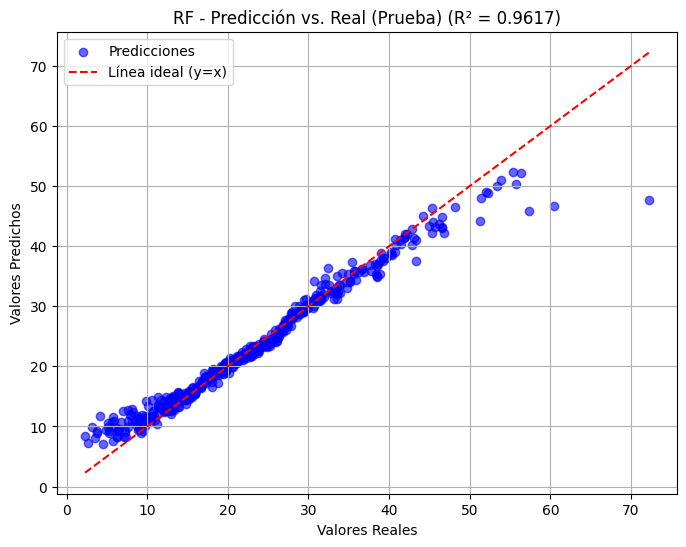

In [ ]:
# Random forest siguiendo el mismo formato de antes

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_rf = RandomForestRegressor(
    n_estimators=100, max_depth=10, min_samples_split=10,
    max_features='sqrt', random_state=42
)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)

# Predicciones para entrenamiento y prueba
y_train_pred = modelo_rf.predict(X_train_scaled)
y_test_pred = modelo_rf.predict(X_test_scaled)

# Función para calcular métricas
def calcular_metricas(y_real, y_pred, X):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    n = len(y_real)
    p = X.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_real, y_pred)
    return mse, r2, r2_adj, mae

# Calcular métricas para entrenamiento y prueba
mse_train, r2_train, r2_adj_train, mae_train = calcular_metricas(y_train, y_train_pred, X_train)
mse_test, r2_test, r2_adj_test, mae_test = calcular_metricas(y_test, y_test_pred, X_test)

# Validación cruzada
cv_scores = cross_val_score(modelo_rf, X_train_scaled, y_train, cv=15, scoring='r2')

# Imprimir métricas
print(f"Entrenamiento:   MSE: {mse_train:.4f}, R²: {r2_train:.4f}, Adjusted R²: {r2_adj_train:.4f}, MAE: {mae_train:.4f}")
print(f"Prueba:          MSE: {mse_test:.4f}, R²: {r2_test:.4f}, Adjusted R²: {r2_adj_test:.4f}, MAE: {mae_test:.4f}")
print(f"Validación cruzada - R² promedio: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Función para graficar
def plot_results(y_real, y_pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, alpha=0.6, label="Predicciones", color="blue")
    plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle="--", color="red", label="Línea ideal (y=x)")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.title(f"{title} (R² = {r2_score(y_real, y_pred):.4f})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar resultados para entrenamiento y prueba
plot_results(y_train, y_train_pred, "RF - Predicción vs. Real (Entrenamiento)")
plot_results(y_test, y_test_pred, "RF - Predicción vs. Real (Prueba)")

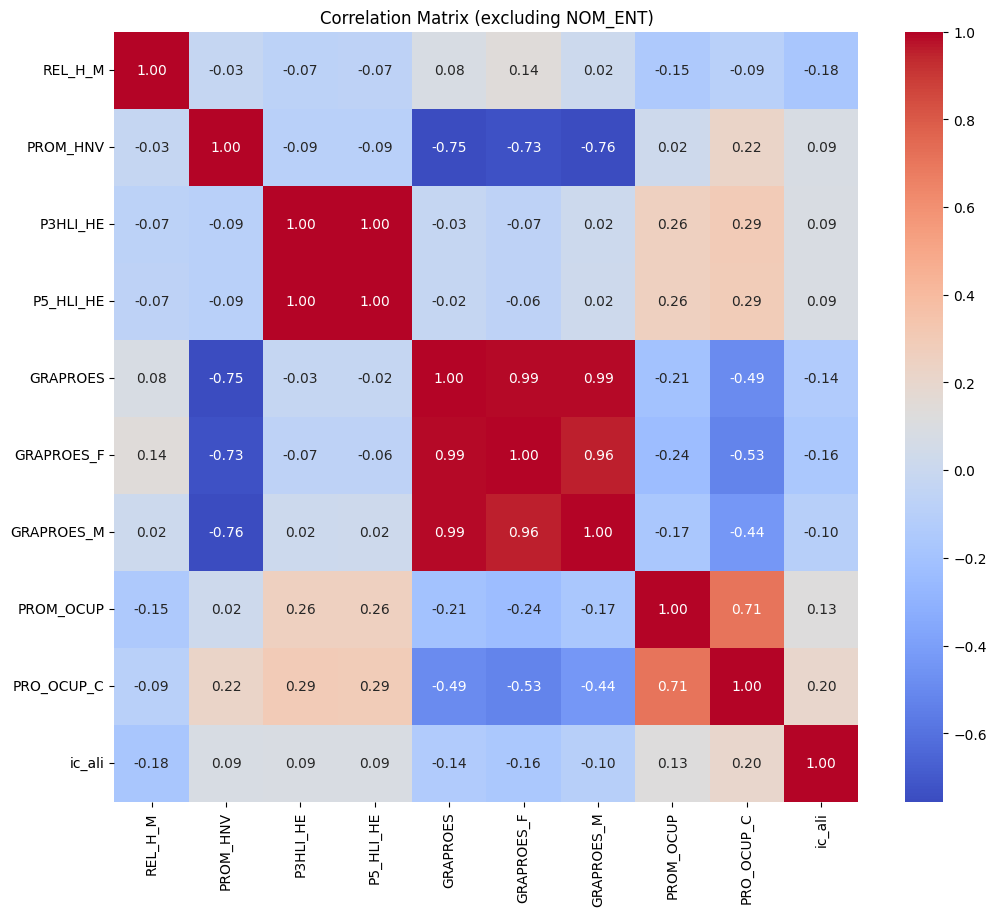

In [ ]:
# prompt: haz una grafica de correlación de las variables que ayudan a encontrar la predictora, evita la de NOM_ENT

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix without 'NOM_ENT'
correlation_matrix = datos.drop('NOM_ENT', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (excluding NOM_ENT)')
plt.show()


In [ ]:
import pickle
filename = 'modelo_xgboost.pkl'
outfile= open(filename, 'wb')
#Guardar datos
pickle.dump(modelo_xgb, outfile)
outfile.close()

In [ ]:
R=modelo_xgb.predict(X_test_scaled)

In [ ]:
R

array([21.692429 , 27.431936 , 24.48979  , 26.73997  , 34.631996 ,
       22.609669 , 34.71776  , 14.267736 , 25.979126 , 13.016099 ,
       17.740551 , 24.886257 , 15.944966 , 21.570446 , 26.576618 ,
       10.81217  , 28.649513 , 21.379786 , 21.936626 , 22.666069 ,
       37.393436 , 14.624176 , 15.991107 , 11.330269 , 14.878521 ,
       37.495735 , 10.00016  , 24.16688  , 20.485775 , 16.62877  ,
       40.393692 , 46.087303 , 14.543822 , 39.440838 , 18.01378  ,
       22.895985 , 21.133947 , 23.965122 , 16.405367 , 31.694405 ,
       32.566944 , 18.454674 , 13.54267  , 11.834513 , 21.213047 ,
       23.925852 , 26.649231 , 30.14213  , 27.709106 , 23.237358 ,
       20.684618 , 24.629873 , 28.115755 , 32.491707 , 28.006605 ,
       40.840168 , 37.857605 , 42.365948 , 43.23832  , 16.660423 ,
       32.207157 , 39.632816 , 23.95539  , 17.956953 , 21.802326 ,
       20.07608  , 30.505548 , 19.207611 , 32.019    , 28.094532 ,
       18.16122  , 38.707447 , 19.143038 , 21.33179  , 22.7556

In [ ]:
R.shape

(494,)